# Importando bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
%matplotlib inline

# Carregando dados

In [2]:
url='https://dadosabertos.poa.br/dataset/ca4bbd08-5200-4548-a0ae-efde50b726bb/resource/b8692b31-eae2-494e-a4de-6842698d636f/download/sinasc_nascimentos.csv'
df = pd.read_csv(url, encoding = 'cp860', sep = ';', low_memory=False)
#df = pd.read_csv('sinasc_nascimentos.csv', dtype='unicode', low_memory=False)
df.head(10)

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,local_nascimento,parto,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca
0,2021-01-01 01:58:41.064,12/2015,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,05/1987,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN
1,2021-01-01 01:58:41.084,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,09/1989,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,N├âO INDUZIDO,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN
2,2021-01-01 01:58:41.088,12/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,10/1987,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN
3,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,08/1998,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3968,N├âO,NaN,MASCULINO,NaN
4,2021-01-01 01:58:41.092,12/2015,DE 4 A 7 ANOS,PRETA,SOLTEIRO,08/1997,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2975,N├âO,NaN,MASCULINO,NaN
5,2021-01-01 01:58:41.092,12/2015,COM 12 ANOS OU MAIS,BRANCA,UNIAO CONSENSUAL,01/1983,141615.0,GERENTE DE LOGISTICA (ARMAZENAGEM E DISTRIBUICAO),DE 4 A 6 CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3025,N├âO,NaN,MASCULINO,NaN
6,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,CASADO,03/1984,521110.0,VENDEDOR DE COMERCIO VAREJISTA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3645,N├âO,NaN,MASCULINO,NaN
7,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,05/1990,411010.0,ASSISTENTE ADMINISTRATIVO,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,INDUZIDO,CEF├üLICA,NaN,3665,N├âO,NaN,MASCULINO,NaN
8,2021-01-01 01:58:41.096,09/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,10/1986,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3585,N├âO,NaN,FEMININO,NaN
9,2021-01-01 01:58:41.096,09/2015,DE 8 A 11 ANOS,PARDA,CASADO,03/1989,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,P├ÊLVICA OU POD├üLICA,NaN,3540,N├âO,NaN,MASCULINO,NaN


# Exibindo as primeiras 5 linhas do dataframe

In [3]:
df.head()

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,local_nascimento,parto,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca
0,2021-01-01 01:58:41.064,12/2015,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,05/1987,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN
1,2021-01-01 01:58:41.084,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,09/1989,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,N├âO INDUZIDO,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN
2,2021-01-01 01:58:41.088,12/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,10/1987,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN
3,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,08/1998,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3968,N├âO,NaN,MASCULINO,NaN
4,2021-01-01 01:58:41.092,12/2015,DE 4 A 7 ANOS,PRETA,SOLTEIRO,08/1997,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2975,N├âO,NaN,MASCULINO,NaN


# Análise Exploratória de Dados
### Quantidade de registros no dataframe
**182933 registros, 22 colunas**

In [4]:
print(df.shape)

(182933, 22)


## Análise básica do conteúdo

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182933 entries, 0 to 182932
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   data_extracao           182933 non-null  object 
 1   data_nascimento         182933 non-null  object 
 2   escolaridade_mae        182853 non-null  object 
 3   raca_mae                179781 non-null  object 
 4   estado_civil_mae        182872 non-null  object 
 5   nascimento_mae          179778 non-null  object 
 6   cbo_mae                 182823 non-null  float64
 7   ocupacao                182823 non-null  object 
 8   nro_consultas_prenatal  182933 non-null  object 
 9   cesaria_antes_parto     90922 non-null   object 
 10  duracao_gestacao        182824 non-null  object 
 11  gravidez                182903 non-null  object 
 12  local_nascimento        182933 non-null  object 
 13  parto                   182914 non-null  object 
 14  trabalho_parto      

### Imprimindo somente o valor da coluna peso da linha 4

In [6]:
df['peso'][4]

2975

### Procurando por linhas que atendam a condição do peso do bebê seja = 2975

In [7]:
df['peso']==2975

0         False
1         False
2         False
3         False
4          True
          ...  
182928    False
182929    False
182930    False
182931    False
182932    False
Name: peso, Length: 182933, dtype: bool

### Imprimindo linhas que atendam a condição do peso do bebê seja > 2975

In [8]:
df[df['peso']>2975]

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,local_nascimento,parto,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca
0,2021-01-01 01:58:41.064,12/2015,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,05/1987,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN
1,2021-01-01 01:58:41.084,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,09/1989,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,N├âO INDUZIDO,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN
2,2021-01-01 01:58:41.088,12/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,10/1987,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN
3,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,08/1998,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3968,N├âO,NaN,MASCULINO,NaN
5,2021-01-01 01:58:41.092,12/2015,COM 12 ANOS OU MAIS,BRANCA,UNIAO CONSENSUAL,01/1983,141615.0,GERENTE DE LOGISTICA (ARMAZENAGEM E DISTRIBUICAO),DE 4 A 6 CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3025,N├âO,NaN,MASCULINO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182927,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,PRETA,SOLTEIRO,12/1999,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,N├âO INDUZIDO,CEF├üLICA,NaN,3286,N├âO,NaN,FEMININO,NaN
182928,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,03/2000,421105.0,ATENDENTE COMERCIAL (AGENCIA POSTAL),DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3605,N├âO,NaN,FEMININO,NaN
182929,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,10/1996,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3615,N├âO,NaN,MASCULINO,NaN
182930,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,09/1992,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2985,N├âO,NaN,FEMININO,NaN


### Procurando por linhas que atendam a condição do parto = CESAREO

In [9]:
df['parto']=='CESAREO'

0         False
1         False
2          True
3         False
4          True
          ...  
182928    False
182929     True
182930     True
182931    False
182932    False
Name: parto, Length: 182933, dtype: bool

### Imprimindo linhas que atendam a condição que a data de nascimento da mãe seja > 01/03/1984

In [10]:
df[df['nascimento_mae']>'01/03/1984']

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,local_nascimento,parto,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca
0,2021-01-01 01:58:41.064,12/2015,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,05/1987,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN
1,2021-01-01 01:58:41.084,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,09/1989,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,N├âO INDUZIDO,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN
2,2021-01-01 01:58:41.088,12/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,10/1987,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN
3,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,08/1998,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3968,N├âO,NaN,MASCULINO,NaN
4,2021-01-01 01:58:41.092,12/2015,DE 4 A 7 ANOS,PRETA,SOLTEIRO,08/1997,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2975,N├âO,NaN,MASCULINO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182928,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,03/2000,421105.0,ATENDENTE COMERCIAL (AGENCIA POSTAL),DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3605,N├âO,NaN,FEMININO,NaN
182929,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,10/1996,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3615,N├âO,NaN,MASCULINO,NaN
182930,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,09/1992,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2985,N├âO,NaN,FEMININO,NaN
182931,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,12/1986,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3304,N├âO,NaN,FEMININO,NaN


### Imprimindo linhas que atendam a condição de que a duração da gravidez seja >= 37 semanas

In [11]:
df[df['duracao_gestacao']>='DE 37 A 41 SEM']

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,local_nascimento,parto,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca
0,2021-01-01 01:58:41.064,12/2015,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,05/1987,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN
1,2021-01-01 01:58:41.084,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,09/1989,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,N├âO INDUZIDO,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN
2,2021-01-01 01:58:41.088,12/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,10/1987,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN
3,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,08/1998,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3968,N├âO,NaN,MASCULINO,NaN
4,2021-01-01 01:58:41.092,12/2015,DE 4 A 7 ANOS,PRETA,SOLTEIRO,08/1997,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2975,N├âO,NaN,MASCULINO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182928,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,03/2000,421105.0,ATENDENTE COMERCIAL (AGENCIA POSTAL),DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3605,N├âO,NaN,FEMININO,NaN
182929,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,10/1996,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3615,N├âO,NaN,MASCULINO,NaN
182930,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,09/1992,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2985,N├âO,NaN,FEMININO,NaN
182931,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,12/1986,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3304,N├âO,NaN,FEMININO,NaN


### Calculando e imprimindo algumas medidas estatísticas básicas sobre a coluna peso:

In [12]:
print('Média do peso: ',df['peso'].mean())
print('Menor valor do peso: ', df['peso'].min())
print('Maior valor do peso: ', df['peso'].max())

Média do peso:  3187.3005034630164
Menor valor do peso:  0
Maior valor do peso:  6035


### Transformando a coluna duracao_gestacao em meses_gestacao

In [13]:
df['meses_gestacao'] = 0

In [14]:
df.loc[df['duracao_gestacao']=='DE 22 A 27 SEM', 'meses_gestacao']=5
df.loc[df['duracao_gestacao']=='DE 37 A 41 SEM', 'meses_gestacao']=9
df.loc[df['duracao_gestacao']=='COM 42 SEM OU MAIS', 'meses_gestacao']=9
df.loc[df['duracao_gestacao']=='DE 32 A 36 SEM', 'meses_gestacao']=8
df.loc[df['duracao_gestacao']=='DE 28 A 31 SEM', 'meses_gestacao']=7

In [15]:
df

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,parto,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao
0,2021-01-01 01:58:41.064,12/2015,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,05/1987,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN,9
1,2021-01-01 01:58:41.084,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,09/1989,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,VAGINAL,N├âO INDUZIDO,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN,9
2,2021-01-01 01:58:41.088,12/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,10/1987,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN,9
3,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,08/1998,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3968,N├âO,NaN,MASCULINO,NaN,9
4,2021-01-01 01:58:41.092,12/2015,DE 4 A 7 ANOS,PRETA,SOLTEIRO,08/1997,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2975,N├âO,NaN,MASCULINO,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182928,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,03/2000,421105.0,ATENDENTE COMERCIAL (AGENCIA POSTAL),DE 4 A 6 CONS,NaN,...,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3605,N├âO,NaN,FEMININO,NaN,9
182929,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,10/1996,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3615,N├âO,NaN,MASCULINO,NaN,9
182930,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,09/1992,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2985,N├âO,NaN,FEMININO,NaN,9
182931,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,12/1986,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3304,N├âO,NaN,FEMININO,NaN,9


### Imprimindo linhas que atendam a condição de que a duração da gravidez seja = 5 meses

In [16]:
df[df['meses_gestacao']==5]

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,parto,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao
14,2021-01-01 01:58:41.102,12/2015,DE 8 A 11 ANOS,PARDA,SOLTEIRO,09/2000,999991.0,ESTUDANTE,NENHUMA,NaN,...,VAGINAL,N├âO INDUZIDO,CEF├üLICA,"├ÜNICO, CEF├üLICA, <37SEM",720,N├âO,NaN,FEMININO,NaN,5
352,2021-01-01 01:58:41.094,12/2015,COM 12 ANOS OU MAIS,BRANCA,SOLTEIRO,12/1984,223305.0,MEDICO VETERINARIO,DE 1 A 3 CONS,SIM,...,CESAREO,N├âO INDUZIDO,P├ÊLVICA OU POD├üLICA,NaN,720,N├âO,NaN,MASCULINO,NaN,5
513,2021-01-01 01:58:41.157,09/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,05/1977,234505.0,PROFESSOR DE ENSINO SUPERIOR NA AREA DE DIDATICA,7 OU MAIS CONS,N├âO,...,CESAREO,N├âO INDUZIDO,TRANSVERSA,NaN,1270,N├âO,NaN,MASCULINO,NaN,5
800,2021-01-01 01:58:41.225,04/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,12/1985,241005.0,ADVOGADO,DE 1 A 3 CONS,SIM,...,CESAREO,N├âO INDUZIDO,P├ÊLVICA OU POD├üLICA,NaN,855,N├âO,NaN,FEMININO,NaN,5
1432,2021-01-01 01:58:41.227,05/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,01/1977,848310.0,CONFEITEIRO,DE 4 A 6 CONS,SIM,...,CESAREO,N├âO INDUZIDO,P├ÊLVICA OU POD├üLICA,NaN,470,N├âO,NaN,FEMININO,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182374,2021-01-01 01:58:50.969,08/2020,COM 12 ANOS OU MAIS,BRANCA,SOLTEIRO,03/2001,411010.0,ASSISTENTE ADMINISTRATIVO,DE 4 A 6 CONS,SIM,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,"├ÜNICO, CEF├üLICA, <37SEM",3505,N├âO,NaN,FEMININO,NaN,5
182467,2021-01-01 01:58:50.975,10/2020,COM 12 ANOS OU MAIS,BRANCA,CASADO,11/1984,111410.0,DIRIGENTE DO SERVICO PUBLICO ESTADUAL E DISTRITAL,7 OU MAIS CONS,SIM,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,"├ÜNICO, CEF├üLICA, <37SEM",1080,N├âO,NaN,MASCULINO,NaN,5
182485,2021-01-01 01:58:50.975,11/2020,DE 4 A 7 ANOS,PARDA,SOLTEIRO,11/2002,999992.0,DONA DE CASA,DE 1 A 3 CONS,NaN,...,VAGINAL,N├âO INDUZIDO,P├ÊLVICA OU POD├üLICA,NaN,870,SIM,Q669,FEMININO,NaN,5
182512,2021-01-01 01:58:50.973,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,08/1991,512105.0,EMPREGADO DOMESTICO NOS SERVICOS GERAIS,DE 4 A 6 CONS,SIM,...,CESAREO,N├âO INDUZIDO,P├ÊLVICA OU POD├üLICA,NaN,890,N├âO,NaN,MASCULINO,NaN,5


### Calculando e imprimindo algumas medidas estatísticas básicas sobre a coluna meses_gestacao:

In [17]:
print('Média dos meses de gestação: ',df['meses_gestacao'].mean())
print('Menor valor dos meses de gestação: ', df['meses_gestacao'].min())
print('Maior valor dos meses de gestação: ', df['meses_gestacao'].max())

Média dos meses de gestação:  8.849496810307599
Menor valor dos meses de gestação:  0
Maior valor dos meses de gestação:  9


### Transformando a coluna nasc_mae em idade_mae

In [18]:
df['data_nascimento'] = pd.to_datetime(df['data_nascimento'])
df['nascimento_mae'] = pd.to_datetime(df['nascimento_mae'])

In [19]:
df['idade_mae'] = df['data_nascimento'] - df['nascimento_mae']

### Tranformando a idade da mãe em um tipo inteiro

In [20]:
df['idade_mae'] = pd.to_numeric(df['idade_mae'].dt.days, downcast='integer')

### Fazendo cálculo para tranformar a idade da mãe, de dias para anos

In [21]:
df['idade_mae'] = df['idade_mae'] / 365

In [22]:
df.head()['idade_mae']

0    28.605479
1    26.265753
2    28.186301
3    17.345205
4    18.345205
Name: idade_mae, dtype: float64

### Imprimindo linhas que atendam a condição de que a idade da mãe seja >= 25 anos

In [23]:
df[df['idade_mae']>=25]

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao,idade_mae
0,2021-01-01 01:58:41.064,2015-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1987-05-01,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,INDUZIDO,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN,9,28.605479
1,2021-01-01 01:58:41.084,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1989-09-01,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,N├âO INDUZIDO,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN,9,26.265753
2,2021-01-01 01:58:41.088,2015-12-01,COM 12 ANOS OU MAIS,BRANCA,CASADO,1987-10-01,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,N├âO INDUZIDO,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN,9,28.186301
5,2021-01-01 01:58:41.092,2015-12-01,COM 12 ANOS OU MAIS,BRANCA,UNIAO CONSENSUAL,1983-01-01,141615.0,GERENTE DE LOGISTICA (ARMAZENAGEM E DISTRIBUICAO),DE 4 A 6 CONS,SIM,...,N├âO INDUZIDO,CEF├üLICA,NaN,3025,N├âO,NaN,MASCULINO,NaN,9,32.936986
6,2021-01-01 01:58:41.092,2015-12-01,DE 8 A 11 ANOS,BRANCA,CASADO,1984-03-01,521110.0,VENDEDOR DE COMERCIO VAREJISTA,7 OU MAIS CONS,SIM,...,N├âO INDUZIDO,CEF├üLICA,NaN,3645,N├âO,NaN,MASCULINO,NaN,9,31.772603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182925,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1981-10-01,512105.0,EMPREGADO DOMESTICO NOS SERVICOS GERAIS,7 OU MAIS CONS,N├âO,...,INDUZIDO,CEF├üLICA,NaN,2745,N├âO,NaN,MASCULINO,NaN,9,39.194521
182926,2021-01-01 01:58:50.978,2020-12-01,COM 12 ANOS OU MAIS,BRANCA,SOLTEIRO,1988-12-01,223405.0,FARMACEUTICO,7 OU MAIS CONS,NaN,...,N├âO INDUZIDO,CEF├üLICA,NaN,3420,N├âO,NaN,FEMININO,NaN,9,32.021918
182930,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1992-09-01,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,N├âO INDUZIDO,CEF├üLICA,NaN,2985,N├âO,NaN,FEMININO,NaN,9,28.268493
182931,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1986-12-01,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,INDUZIDO,CEF├üLICA,NaN,3304,N├âO,NaN,FEMININO,NaN,9,34.024658


### Calculando e imprimindo algumas medidas estatísticas básicas sobre a coluna idade_mae:

In [24]:
print('Média de anos de idade: ',df['idade_mae'].mean())
print('Menor valor de anos de idade: ', df['idade_mae'].min())
print('Maior valor de anos de idade: ', df['idade_mae'].max())

Média de anos de idade:  28.696761241451195
Menor valor de anos de idade:  12.008219178082191
Maior valor de anos de idade:  56.28767123287671


### Transformando a coluna parto em tipo_parto:

In [25]:
df['tipo_parto'] = 0

In [26]:
df.loc[df['parto']=='CESAREO', 'tipo_parto']=1
df.loc[df['parto']=='VAGINAL', 'tipo_parto']=2

In [27]:
df

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao,idade_mae,tipo_parto
0,2021-01-01 01:58:41.064,2015-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1987-05-01,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN,9,28.605479,2
1,2021-01-01 01:58:41.084,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1989-09-01,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN,9,26.265753,2
2,2021-01-01 01:58:41.088,2015-12-01,COM 12 ANOS OU MAIS,BRANCA,CASADO,1987-10-01,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN,9,28.186301,1
3,2021-01-01 01:58:41.092,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1998-08-01,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,CEF├üLICA,NaN,3968,N├âO,NaN,MASCULINO,NaN,9,17.345205,2
4,2021-01-01 01:58:41.092,2015-12-01,DE 4 A 7 ANOS,PRETA,SOLTEIRO,1997-08-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,CEF├üLICA,NaN,2975,N├âO,NaN,MASCULINO,NaN,9,18.345205,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182928,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,2000-03-01,421105.0,ATENDENTE COMERCIAL (AGENCIA POSTAL),DE 4 A 6 CONS,NaN,...,CEF├üLICA,NaN,3605,N├âO,NaN,FEMININO,NaN,9,20.767123,2
182929,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1996-10-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,CEF├üLICA,NaN,3615,N├âO,NaN,MASCULINO,NaN,9,24.183562,1
182930,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1992-09-01,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,CEF├üLICA,NaN,2985,N├âO,NaN,FEMININO,NaN,9,28.268493,1
182931,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1986-12-01,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,CEF├üLICA,NaN,3304,N├âO,NaN,FEMININO,NaN,9,34.024658,2


### Transformando a coluna estado_civil_mae em tipo_estado_civil:

In [28]:
df['tipo_estado_civil'] = 0

In [29]:
df.loc[df['estado_civil_mae']=='SOLTEIRO', 'tipo_estado_civil']=1
df.loc[df['estado_civil_mae']=='CASADO', 'tipo_estado_civil']=2
df.loc[df['estado_civil_mae']=='SEPARADO JUDICIALMENTE', 'tipo_estado_civil']=4

In [30]:
df

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao,idade_mae,tipo_parto,tipo_estado_civil
0,2021-01-01 01:58:41.064,2015-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1987-05-01,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,NaN,3230,N├âO,NaN,FEMININO,NaN,9,28.605479,2,1
1,2021-01-01 01:58:41.084,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1989-09-01,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,NaN,3190,N├âO,NaN,MASCULINO,NaN,9,26.265753,2,1
2,2021-01-01 01:58:41.088,2015-12-01,COM 12 ANOS OU MAIS,BRANCA,CASADO,1987-10-01,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,NaN,3535,N├âO,NaN,FEMININO,NaN,9,28.186301,1,2
3,2021-01-01 01:58:41.092,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1998-08-01,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,NaN,3968,N├âO,NaN,MASCULINO,NaN,9,17.345205,2,1
4,2021-01-01 01:58:41.092,2015-12-01,DE 4 A 7 ANOS,PRETA,SOLTEIRO,1997-08-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,NaN,2975,N├âO,NaN,MASCULINO,NaN,9,18.345205,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182928,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,2000-03-01,421105.0,ATENDENTE COMERCIAL (AGENCIA POSTAL),DE 4 A 6 CONS,NaN,...,NaN,3605,N├âO,NaN,FEMININO,NaN,9,20.767123,2,1
182929,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1996-10-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,NaN,3615,N├âO,NaN,MASCULINO,NaN,9,24.183562,1,1
182930,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1992-09-01,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,NaN,2985,N├âO,NaN,FEMININO,NaN,9,28.268493,1,1
182931,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1986-12-01,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,NaN,3304,N├âO,NaN,FEMININO,NaN,9,34.024658,2,1


### Transformando a coluna local_nascimento em tipo_local_nascimento:

In [31]:
df['tipo_local_nascimento'] = 0

In [32]:
df.loc[df['local_nascimento']=='HOSPITAL', 'tipo_local_nascimento']=1
df.loc[df['local_nascimento']=='DOMICILIO', 'tipo_local_nascimento']=2
df.loc[df['local_nascimento']=='OUTRO ESTAB SAUDE', 'tipo_local_nascimento']=3
df.loc[df['local_nascimento']=='OUTROS', 'tipo_local_nascimento']=4

In [33]:
df

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,peso,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao,idade_mae,tipo_parto,tipo_estado_civil,tipo_local_nascimento
0,2021-01-01 01:58:41.064,2015-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1987-05-01,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,3230,N├âO,NaN,FEMININO,NaN,9,28.605479,2,1,1
1,2021-01-01 01:58:41.084,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1989-09-01,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,3190,N├âO,NaN,MASCULINO,NaN,9,26.265753,2,1,1
2,2021-01-01 01:58:41.088,2015-12-01,COM 12 ANOS OU MAIS,BRANCA,CASADO,1987-10-01,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,3535,N├âO,NaN,FEMININO,NaN,9,28.186301,1,2,1
3,2021-01-01 01:58:41.092,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1998-08-01,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,3968,N├âO,NaN,MASCULINO,NaN,9,17.345205,2,1,1
4,2021-01-01 01:58:41.092,2015-12-01,DE 4 A 7 ANOS,PRETA,SOLTEIRO,1997-08-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,2975,N├âO,NaN,MASCULINO,NaN,9,18.345205,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182928,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,2000-03-01,421105.0,ATENDENTE COMERCIAL (AGENCIA POSTAL),DE 4 A 6 CONS,NaN,...,3605,N├âO,NaN,FEMININO,NaN,9,20.767123,2,1,1
182929,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1996-10-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,3615,N├âO,NaN,MASCULINO,NaN,9,24.183562,1,1,1
182930,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1992-09-01,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,2985,N├âO,NaN,FEMININO,NaN,9,28.268493,1,1,1
182931,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1986-12-01,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,3304,N├âO,NaN,FEMININO,NaN,9,34.024658,2,1,1


### Verificando as informações das colunas que temos

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182933 entries, 0 to 182932
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   data_extracao           182933 non-null  object        
 1   data_nascimento         182933 non-null  datetime64[ns]
 2   escolaridade_mae        182853 non-null  object        
 3   raca_mae                179781 non-null  object        
 4   estado_civil_mae        182872 non-null  object        
 5   nascimento_mae          179778 non-null  datetime64[ns]
 6   cbo_mae                 182823 non-null  float64       
 7   ocupacao                182823 non-null  object        
 8   nro_consultas_prenatal  182933 non-null  object        
 9   cesaria_antes_parto     90922 non-null   object        
 10  duracao_gestacao        182824 non-null  object        
 11  gravidez                182903 non-null  object        
 12  local_nascimento        182933

### Verificando a quantidade de dados nulos que temos:

### Tratando linhas com valores faltantes:

In [35]:
df.isnull().sum()

data_extracao                  0
data_nascimento                0
escolaridade_mae              80
raca_mae                    3152
estado_civil_mae              61
nascimento_mae              3155
cbo_mae                      110
ocupacao                     110
nro_consultas_prenatal         0
cesaria_antes_parto        92011
duracao_gestacao             109
gravidez                      30
local_nascimento               0
parto                         19
trabalho_parto              3821
apresentacao_crianca        3418
classe_robson             162128
peso                           0
possui_anomalia               42
cid_anomalia              180372
sexo                          20
raca                      179881
meses_gestacao                 0
idade_mae                   3155
tipo_parto                     0
tipo_estado_civil              0
tipo_local_nascimento          0
dtype: int64

In [36]:
values= {'nascimento_mae': df.nascimento_mae.mean()}
values= {'idade_mae': df.idade_mae.mean()}
values= {'cbo_mae': df.cbo_mae.mean()}
values= {'tipo_estado_civil': df.tipo_estado_civil.mean()}
values= {'idade_mae': df.idade_mae.mean()}

In [37]:
df.fillna(value=values, inplace=True)

In [38]:
df.isnull().sum()

data_extracao                  0
data_nascimento                0
escolaridade_mae              80
raca_mae                    3152
estado_civil_mae              61
nascimento_mae              3155
cbo_mae                      110
ocupacao                     110
nro_consultas_prenatal         0
cesaria_antes_parto        92011
duracao_gestacao             109
gravidez                      30
local_nascimento               0
parto                         19
trabalho_parto              3821
apresentacao_crianca        3418
classe_robson             162128
peso                           0
possui_anomalia               42
cid_anomalia              180372
sexo                          20
raca                      179881
meses_gestacao                 0
idade_mae                      0
tipo_parto                     0
tipo_estado_civil              0
tipo_local_nascimento          0
dtype: int64

In [39]:
df.describe()

,cbo_mae,peso,meses_gestacao,idade_mae,tipo_parto,tipo_estado_civil,tipo_local_nascimento
count,182823.000000,182933.000000,182933.000000,182933.000000,182933.000000,182933.000000,182933.000000
mean,629376.633405,3187.300503,8.849497,28.696761,1.491623,1.136695,1.009156
std,336114.670096,579.669503,0.523748,6.884439,0.500172,0.747783,0.135197
min,0.000000,0.000000,0.000000,12.008219,0.000000,0.000000,0.000000
25%,322205.000000,2900.000000,9.000000,23.016438,1.000000,1.000000,1.000000
50%,516115.000000,3232.000000,9.000000,28.696761,1.000000,1.000000,1.000000
75%,999992.000000,3550.000000,9.000000,34.106849,2.000000,2.000000,1.000000
max,999994.000000,6035.000000,9.000000,56.287671,2.000000,4.000000,4.000000


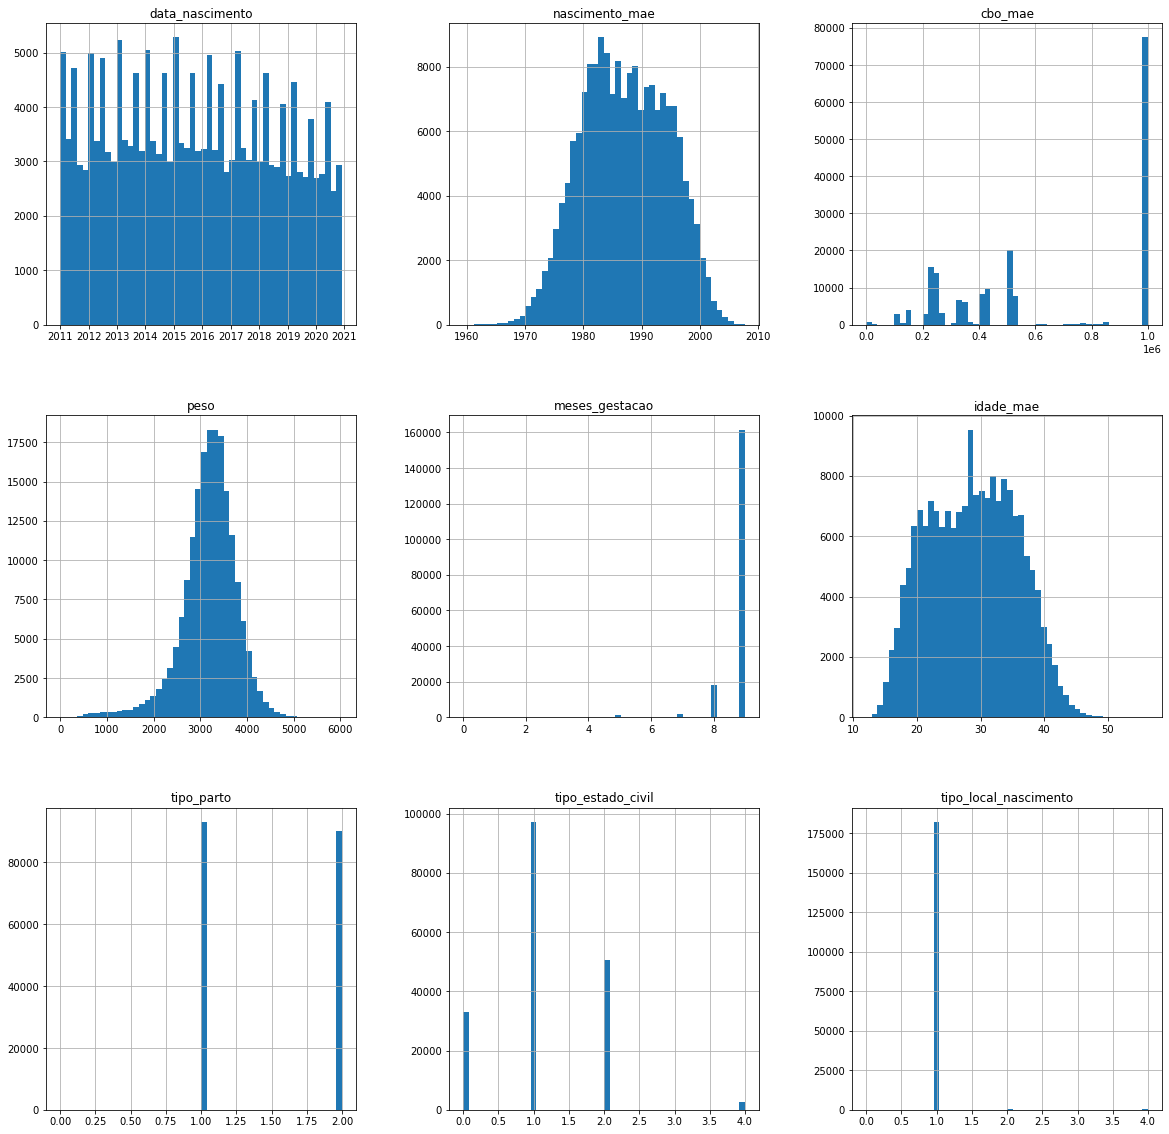

In [40]:
#Calculando e imprimindo histogramas sobre todas as colunas numéricas
df.hist(bins=50, figsize=(20,20))
plt.show()

### Gerando gráfico de peso e idade_mae:

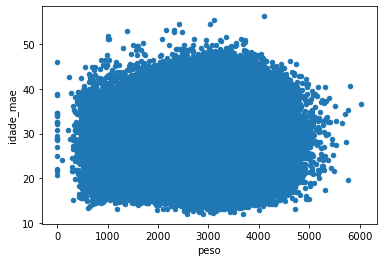

In [41]:
df.plot(x='peso', y='idade_mae', kind='scatter')
plt.show()

## Análise de correlação entre colunas
### Gráficos de dispersão comparando todas as colunas entre si:

In [42]:
feature_names = ['data_nascimento','nascimento_mae','cbo_mae','peso','meses_gestacao','idade_mae','tipo_parto','tipo_estado_civil','tipo_local_nascimento']

In [ ]:
pd.plotting.scatter_matrix(df[feature_names],figsize=(20,20))
plt.show()

### Gerando gráfico de tipo_parto e tipo_local_nascimento:

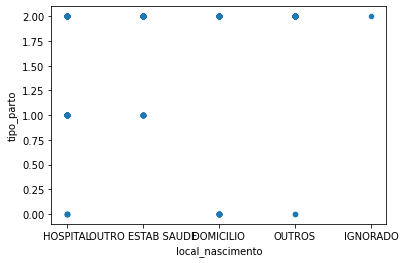

In [44]:
df.plot(x='local_nascimento', y='tipo_parto', kind='scatter')
plt.show()

### Gerando gráfico de meses_gestacao e peso:

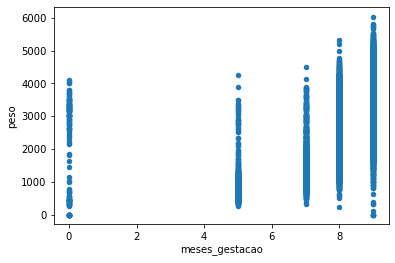

In [45]:
df.plot(x='meses_gestacao', y='peso', kind='scatter')
plt.show()

In [46]:
r, p = stats.pearsonr(df['meses_gestacao'].values, df['peso'].values)
r

0.5398012246258033

### Escolha das colunas preditivas númericas:

In [47]:
num_feature_names = ['peso','meses_gestacao','idade_mae','tipo_estado_civil','tipo_local_nascimento']

### Calculando matriz de correlações entre as colunas preditivas númericas:

In [48]:
corr = np.corrcoef(df[num_feature_names],rowvar=False)
corr

array([[ 1.00000000e+00,  5.39801225e-01, -1.32813966e-03,
        -5.80092039e-04, -4.91340307e-02],
       [ 5.39801225e-01,  1.00000000e+00, -2.83636377e-02,
        -1.13548004e-02, -6.73891489e-02],
       [-1.32813966e-03, -2.83636377e-02,  1.00000000e+00,
         2.24318455e-01, -8.20031496e-03],
       [-5.80092039e-04, -1.13548004e-02,  2.24318455e-01,
         1.00000000e+00, -1.12449165e-02],
       [-4.91340307e-02, -6.73891489e-02, -8.20031496e-03,
        -1.12449165e-02,  1.00000000e+00]])

### Dataframe pandas para visualização da matriz de correlações:

In [49]:
dfcorr = pd.DataFrame(corr,index=num_feature_names,columns=num_feature_names)
dfcorr

,peso,meses_gestacao,idade_mae,tipo_estado_civil,tipo_local_nascimento
peso,1.000000,0.539801,-0.001328,-0.000580,-0.049134
meses_gestacao,0.539801,1.000000,-0.028364,-0.011355,-0.067389
idade_mae,-0.001328,-0.028364,1.000000,0.224318,-0.008200
tipo_estado_civil,-0.000580,-0.011355,0.224318,1.000000,-0.011245
tipo_local_nascimento,-0.049134,-0.067389,-0.008200,-0.011245,1.000000


### Separando os conjuntos de treino e teste

In [63]:
from sklearn.model_selection import train_test_split


# separando os conjuntos de dados de treino e teste
df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=42)

# separando a coluna alvo do conjunto de treino
df_treino_labels = df_treino['tipo_parto'].copy()
df_treino        = df_treino.drop(columns='tipo_parto')

# separando a coluna alvo do conjunto de teste
df_teste_labels = df_teste['tipo_parto'].copy()
df_teste        = df_teste.drop(columns='tipo_parto')

### Pré-processamento:

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [65]:
nomes_atributos_numericos   = ['peso', 'meses_gestacao', 'idade_mae']
nomes_atributos_categoricos = ['tipo_estado_civil','tipo_local_nascimento']

In [66]:
pipeline_atr_numericos = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

preproc_completo = ColumnTransformer([
    ('numericos',   pipeline_atr_numericos, nomes_atributos_numericos),
    ('categoricos', OneHotEncoder(),        nomes_atributos_categoricos),
    ], 
    sparse_threshold=0)

In [67]:
# pre-processamento do conjunto de treino
X_treino = preproc_completo.fit_transform(df_treino)

In [68]:
X_treino[0:2]

array([[-0.26148617,  0.28718254,  0.57660607,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [-0.0289135 ,  0.28718254,  0.96465993,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ]])

In [69]:
# pre-processamento do conjunto de teste
X_teste = preproc_completo.transform(df_teste)

In [70]:
X_teste[0:2]

array([[0.78939773, 0.28718254, 0.67361953, 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.71187351, 0.28718254, 0.49271328, 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ]])

In [71]:
y_treino = df_treino_labels.values.reshape(-1,1)
y_teste  = df_teste_labels.values.reshape(-1,1)

### Eliminando atributos desnecessários:

In [72]:
df_treino = df_treino.drop(columns=['raca_mae','classe_robson','cid_anomalia','raca'])
df_teste  = df_teste.drop(columns=['raca_mae','classe_robson','cid_anomalia','raca'])

In [73]:
df_treino

,data_extracao,data_nascimento,escolaridade_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,duracao_gestacao,...,parto,trabalho_parto,apresentacao_crianca,peso,possui_anomalia,sexo,meses_gestacao,idade_mae,tipo_estado_civil,tipo_local_nascimento
96310,2021-01-01 01:58:46.590,2011-07-01,COM 12 ANOS OU MAIS,SOLTEIRO,1978-11-01,233105.0,PROFESSOR DA AREA DE MEIO AMBIENTE,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,3035,N├âO,FEMININO,9,32.684932,1,1
29820,2021-01-01 01:58:42.994,2014-12-01,DE 8 A 11 ANOS,CASADO,1979-08-01,515215.0,AUXILIAR DE LABORATORIO DE ANALISES CLINICAS,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,CESAREO,N├âO INDUZIDO,P├ÊLVICA OU POD├üLICA,3170,N├âO,FEMININO,9,35.358904,2,1
162349,2021-01-01 01:58:49.255,2018-12-01,DE 8 A 11 ANOS,SOLTEIRO,1995-04-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,3470,N├âO,FEMININO,9,23.684932,1,1
126318,2021-01-01 01:58:47.614,2016-01-01,DE 8 A 11 ANOS,SOLTEIRO,1977-08-01,516210.0,CUIDADOR DE IDOSOS,7 OU MAIS CONS,NaN,DE 37 A 41 SEM,...,VAGINAL,INDUZIDO,CEF├üLICA,3750,N├âO,MASCULINO,9,38.443836,1,1
45846,2021-01-01 01:58:44.241,2014-04-01,DE 4 A 7 ANOS,CASADO,1990-07-01,521110.0,VENDEDOR DE COMERCIO VAREJISTA,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,3605,N├âO,MASCULINO,9,23.767123,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,2021-01-01 01:58:47.411,2017-06-01,DE 8 A 11 ANOS,SOLTEIRO,1997-03-01,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,DE 37 A 41 SEM,...,VAGINAL,N├âO INDUZIDO,CEF├üLICA,2940,N├âO,MASCULINO,9,20.265753,1,1
103694,2021-01-01 01:58:46.970,2011-03-01,DE 8 A 11 ANOS,SOLTEIRO,1974-11-01,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,DE 37 A 41 SEM,...,VAGINAL,N├âO INDUZIDO,CEF├üLICA,2695,N├âO,MASCULINO,9,36.353425,1,1
131932,2021-01-01 01:58:48.035,2019-11-01,DE 4 A 7 ANOS,SOLTEIRO,1995-04-01,512105.0,EMPREGADO DOMESTICO NOS SERVICOS GERAIS,DE 4 A 6 CONS,NaN,DE 37 A 41 SEM,...,VAGINAL,N├âO INDUZIDO,CEF├üLICA,2790,N├âO,MASCULINO,9,24.602740,1,1
146867,2021-01-01 01:58:48.459,2019-08-01,COM 12 ANOS OU MAIS,SOLTEIRO,1991-02-01,411010.0,ASSISTENTE ADMINISTRATIVO,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,3310,N├âO,MASCULINO,9,28.515068,1,1


In [74]:
df_teste

,data_extracao,data_nascimento,escolaridade_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,duracao_gestacao,...,parto,trabalho_parto,apresentacao_crianca,peso,possui_anomalia,sexo,meses_gestacao,idade_mae,tipo_estado_civil,tipo_local_nascimento
24595,2021-01-01 01:58:42.426,2015-04-01,DE 8 A 11 ANOS,CASADO,1981-12-01,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,DE 37 A 41 SEM,...,CESAREO,INDUZIDO,CEF├üLICA,3645,N├âO,MASCULINO,9,33.353425,2,1
90357,2021-01-01 01:58:46.337,2011-01-01,COM 12 ANOS OU MAIS,SOLTEIRO,1978-12-01,223208.0,CIRURGIAO DENTISTA - CLINICO GERAL,7 OU MAIS CONS,NaN,DE 37 A 41 SEM,...,VAGINAL,N├âO INDUZIDO,CEF├üLICA,3600,N├âO,FEMININO,9,32.106849,1,1
63222,2021-01-01 01:58:45.027,2013-05-01,COM 12 ANOS OU MAIS,CASADO,1988-01-01,422205.0,TELEFONISTA,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,3490,N├âO,FEMININO,9,25.347945,2,1
93045,2021-01-01 01:58:46.456,2011-10-01,DE 8 A 11 ANOS,SOLTEIRO,1995-04-01,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,DE 32 A 36 SEM,...,VAGINAL,N├âO INDUZIDO,CEF├üLICA,1685,N├âO,MASCULINO,8,16.512329,1,1
179437,2021-01-01 01:58:50.959,2020-12-01,DE 8 A 11 ANOS,SOLTEIRO,1990-07-01,517310.0,AGENTE DE SEGURANCA,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,3730,N├âO,FEMININO,9,30.441096,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71954,2021-01-01 01:58:45.703,2016-07-01,DE 8 A 11 ANOS,SOLTEIRO,1985-03-01,322405.0,TECNICO EM HIGIENE DENTAL,7 OU MAIS CONS,NaN,DE 37 A 41 SEM,...,VAGINAL,N├âO INDUZIDO,CEF├üLICA,3105,N├âO,MASCULINO,9,31.356164,1,1
16878,2021-01-01 01:58:42.191,2013-07-01,COM 12 ANOS OU MAIS,SOLTEIRO,1976-08-01,223115.0,MEDICO CLINICO,7 OU MAIS CONS,SIM,DE 32 A 36 SEM,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,2356,N├âO,FEMININO,8,36.939726,1,1
13962,2021-01-01 01:58:42.141,2015-08-01,DE 8 A 11 ANOS,SOLTEIRO,1993-10-01,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,DE 37 A 41 SEM,...,VAGINAL,INDUZIDO,CEF├üLICA,2875,N├âO,MASCULINO,9,21.846575,1,1
27581,2021-01-01 01:58:42.722,2013-01-01,DE 8 A 11 ANOS,CASADO,1982-11-01,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,DE 37 A 41 SEM,...,VAGINAL,INDUZIDO,CEF├üLICA,3465,N├âO,FEMININO,9,30.189041,2,1


## Regressão Logística:

In [76]:
# pre-processamento da coluna alvo para regressão logística
y_treino_log = df_treino_labels.values == 1
y_teste_log = df_teste_labels.values == 1

In [77]:
y_treino_log[0:5] # resultado esperado para as primeiras 5 amostras de treino

array([ True,  True,  True, False,  True])

### Treinando e avaliando um modelo de regressão logística:

In [85]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_treino, y_treino_log)
log_reg.classes_

array([False,  True])

In [86]:
y_previsto_log = log_reg.predict(X_teste)
y_previsto_log

array([ True,  True,  True, ..., False,  True, False])

In [87]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_teste_log,y_previsto_log))

Acurácia:  0.6386148085385519
